# Shipment Pricing Prediction
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.

- You work for a company that sells sculptures that are acquired from various artists around the world. Your task is to predict the cost required to ship these sculptures to customers based on the information provided in the dataset.

### 2)  Import Data 

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import the CSV Data as Pandas DataFrame**

In [75]:
df = pd.read_csv('data/shipment.csv')

**Show Top 5 Records**

In [76]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


**Shape of the dataset**

In [77]:
df.shape

(6500, 20)

**Summary of the dataset**

In [78]:
# Display summary statistics for a dataframe
df.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


### Statistical Inferences
- Median Price Of Sculpture is 1192.
- 25% of the population is Price Of Sculpture below 5
- Average Artist Reputation of the population is 0.46

* The difference between 75th percentile and Max also suggests the skewness 

* We can confirm the insights we got from data distribution, as skewness is more for Height, Width, and Base Shipping Price, and skewness of Weight, Price of Sculpture because of Outliers 

**Check Datatypes in the dataset**

In [79]:
df.dtypes

Customer Id               object
Artist Name               object
Artist Reputation        float64
Height                   float64
Width                    float64
Weight                   float64
Material                  object
Price Of Sculpture       float64
Base Shipping Price      float64
International             object
Express Shipment          object
Installation Included     object
Transport                 object
Fragile                   object
Customer Information      object
Remote Location           object
Scheduled Date            object
Delivery Date             object
Customer Location         object
Cost                     float64
dtype: object

## 3. EXPLORING DATA

**Most of the features seems to be of object data type, Now let's seperate Categorical and numerical columns**

In [80]:
target_feature = 'Cost'

In [81]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 7 numerical features : ['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price', 'Cost']

We have 13 categorical features : ['Customer Id', 'Artist Name', 'Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location', 'Scheduled Date', 'Delivery Date', 'Customer Location']


## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Numerical Features

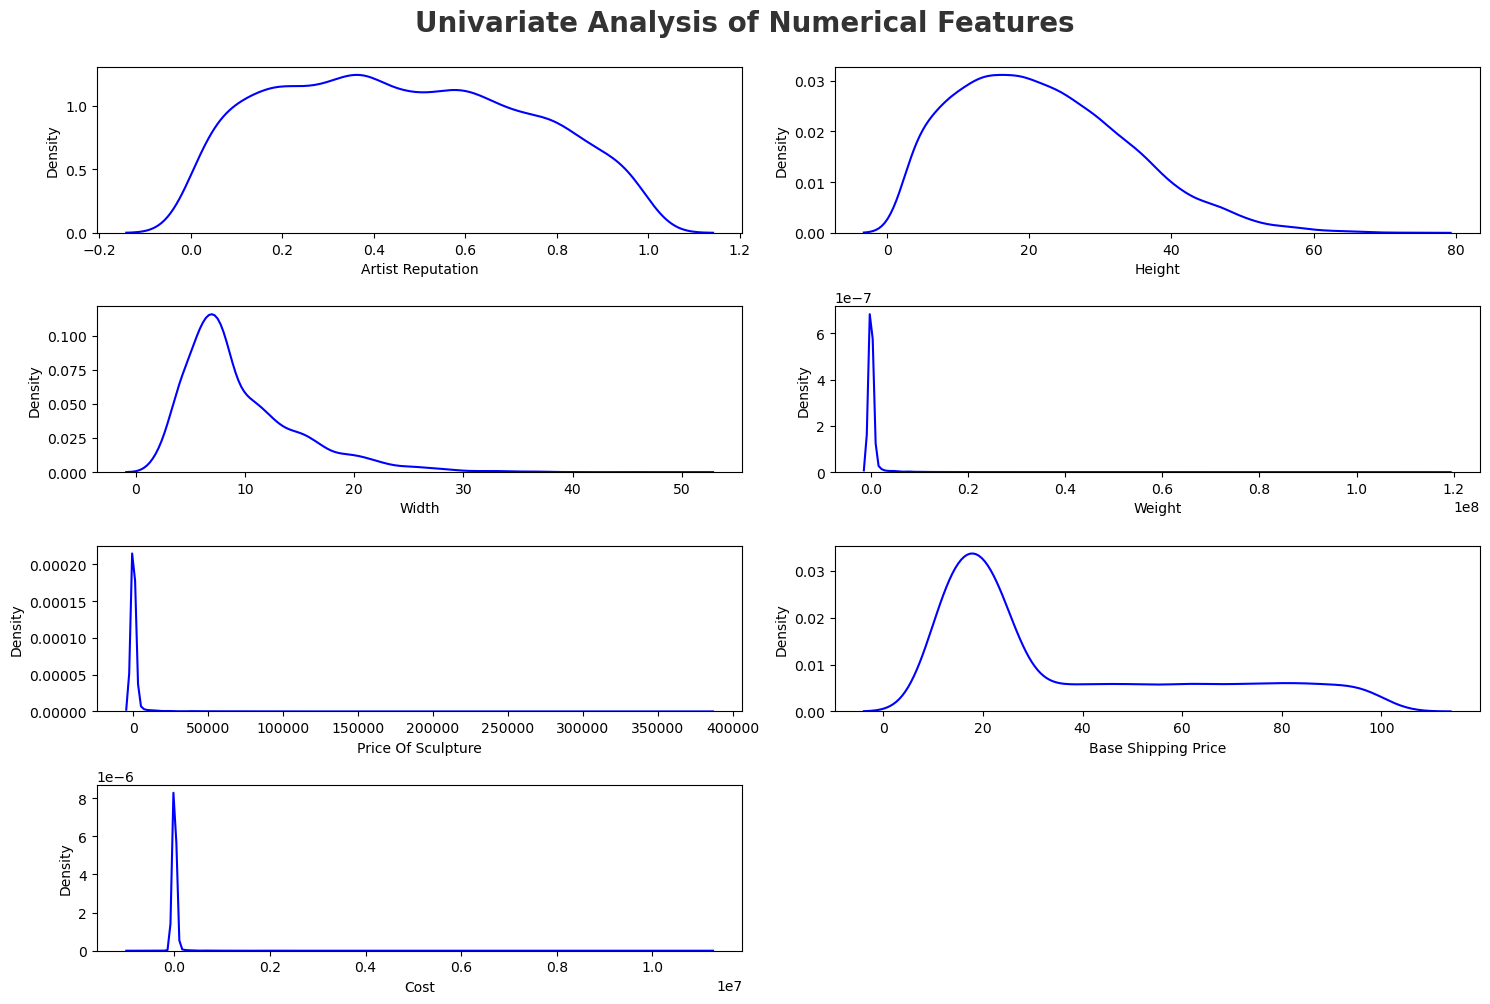

In [82]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

<font size=3>**Report**</font> 

* <font size=3> `Height`, `Width` and `Base Shipping price` are positively skewed</font> 

* <font size=3>`Weight`, `Price of Sculpture` has many outliers</font> 

### Categorical Features

In [83]:
df.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


In [84]:
categorical_columns = []
for i in categorical_features:
    print(f'{i}: {len(df[i].unique())}')
    if len(df[i].unique()) < 10:
        categorical_columns.append(i)
        

Customer Id: 6500
Artist Name: 6449
Material: 8
International: 2
Express Shipment: 2
Installation Included: 2
Transport: 4
Fragile: 2
Customer Information: 2
Remote Location: 3
Scheduled Date: 1660
Delivery Date: 1664
Customer Location: 6500


In [85]:
categorical_features

['Customer Id',
 'Artist Name',
 'Material',
 'International',
 'Express Shipment',
 'Installation Included',
 'Transport',
 'Fragile',
 'Customer Information',
 'Remote Location',
 'Scheduled Date',
 'Delivery Date',
 'Customer Location']

* `Customer Id`, `Artist Name`, `Customer location` have 6500 unique values, so they can be dropped

* `Scheduled date` and `Delivery date` needs feature engineering

In [86]:
categorical_columns

['Material',
 'International',
 'Express Shipment',
 'Installation Included',
 'Transport',
 'Fragile',
 'Customer Information',
 'Remote Location']

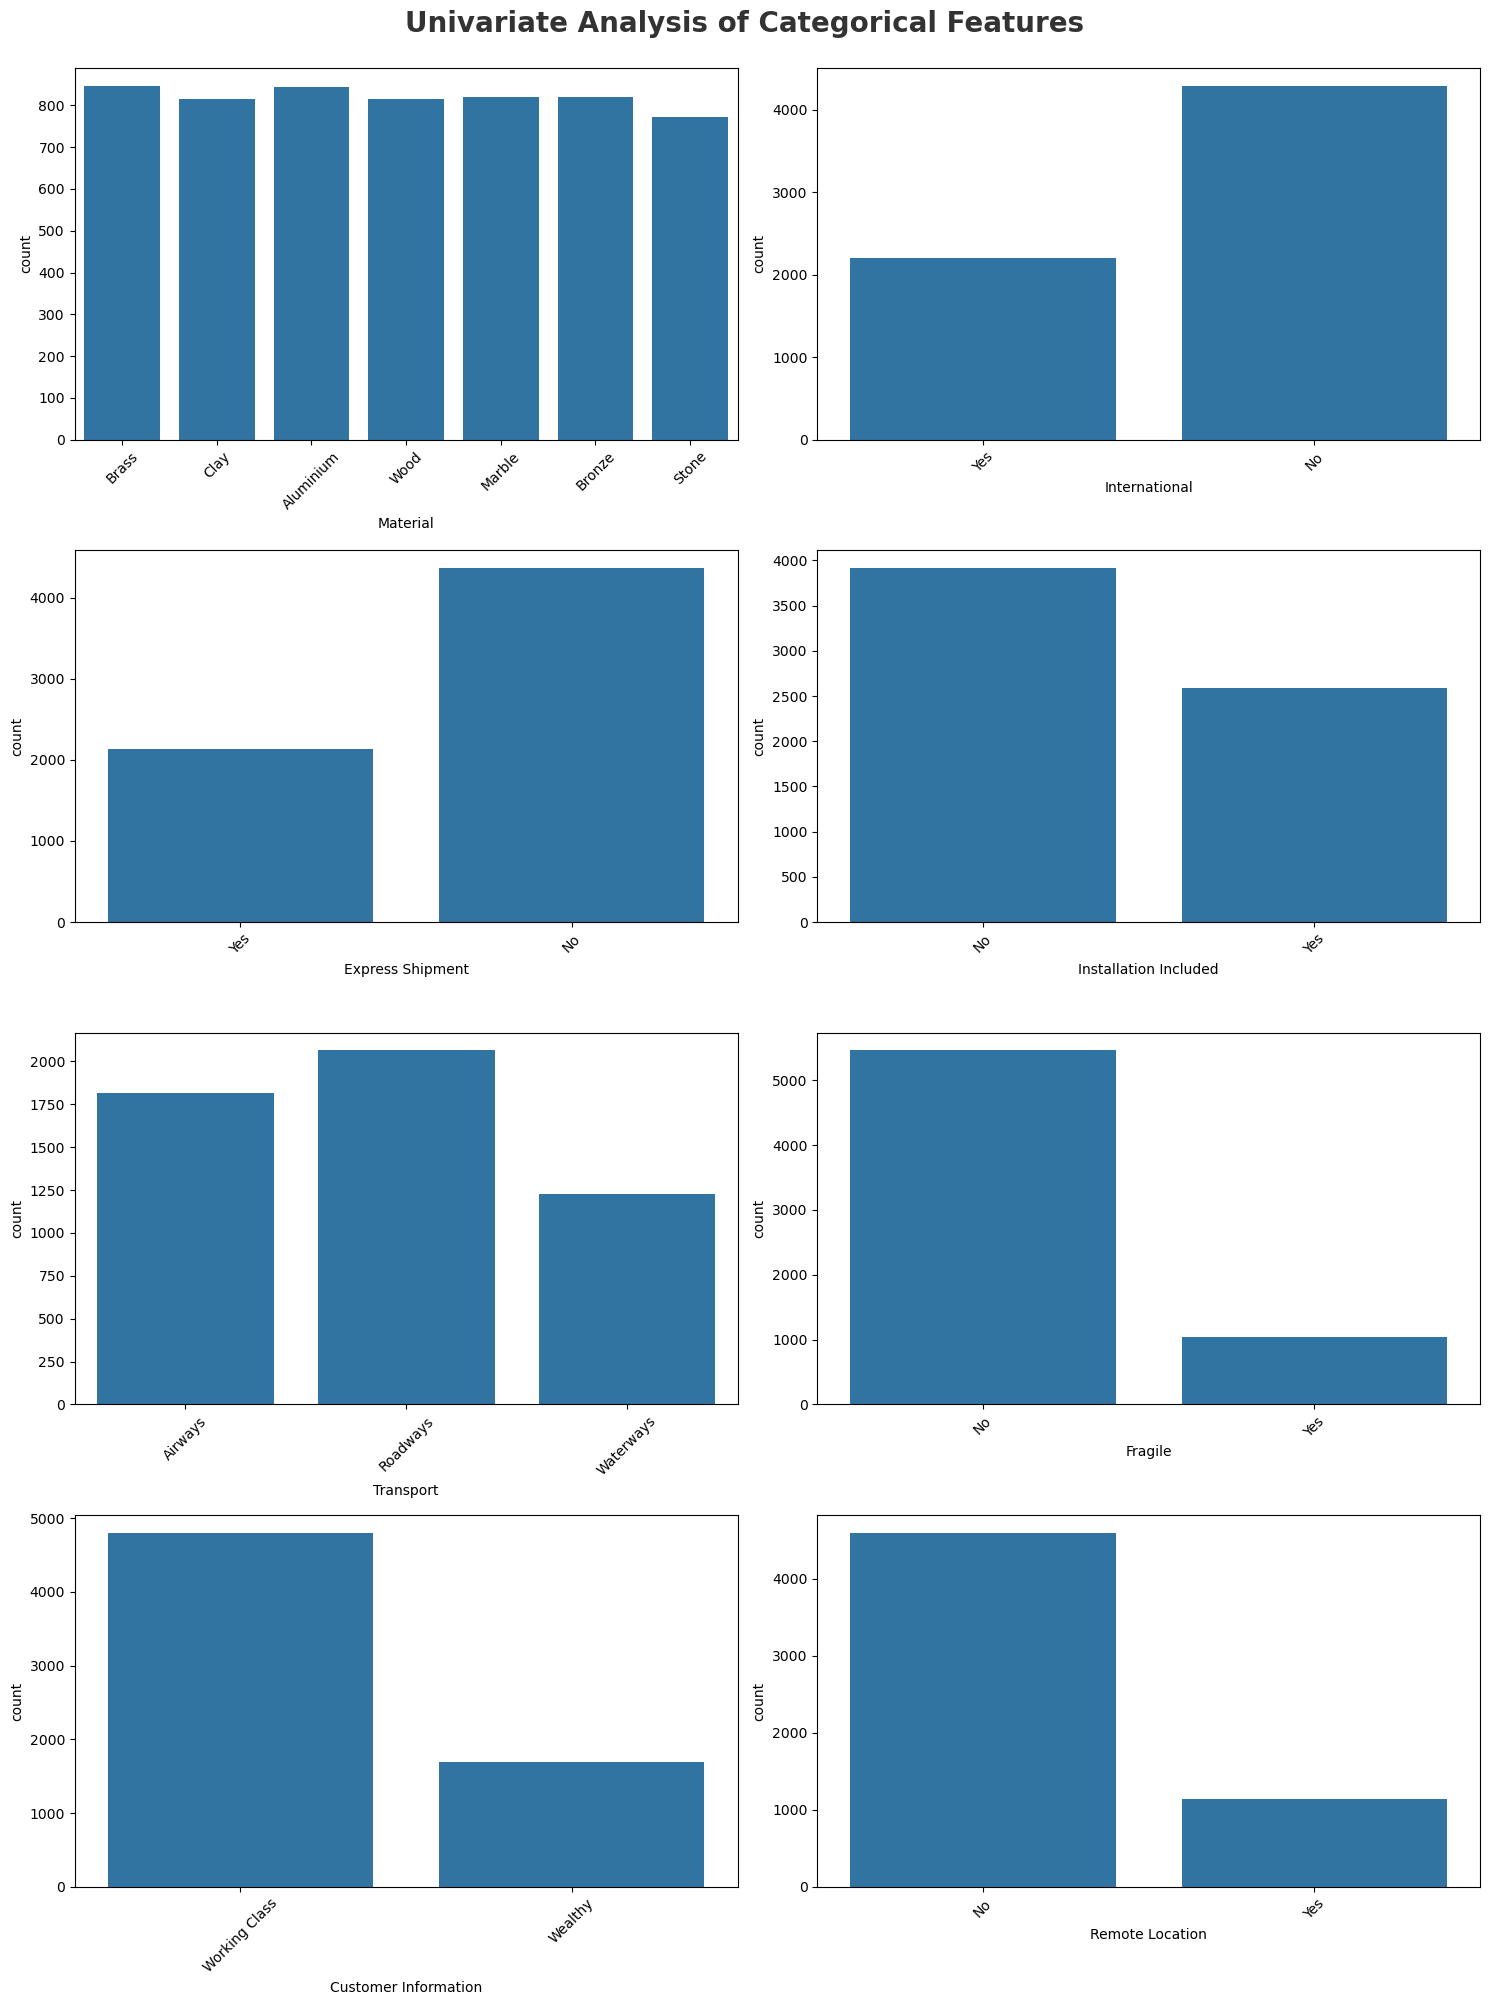

In [87]:
# categorical columns
plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(categorical_columns)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=df[categorical_columns[i]])
    plt.xlabel(categorical_columns[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

**Insights** 

* `Material column` has seven unique value, which are almost equally distributed</font> 

* There are 6 bi-variate categorical columns</font> 

<font size=3>**Checking the Null Values in dataset**</font> 


In [88]:
df.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

**Insights** 

- There are 7 columns which has null values

## Multivariate Analysis
* Multivariate analysis is the analysis of more than one variable.

<font size=4>**Correlation in Numerical Features**</font> 

In [89]:
#df[(list(df.columns)[1:])].corr()

# Select all columns except the first one
#selected_columns = list(df.columns)[1:]

# Filter out non-numeric columns
#numeric_df = df[selected_columns].select_dtypes(include=[np.number])

# Compute the correlation matrix
# correlation_matrix = numeric_df.corr()

# print(correlation_matrix)
import numpy as np
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
Artist Reputation,1.000000,-0.000513,-0.009203,0.017113,0.054286,-0.011820,0.067368
Height,-0.000513,1.000000,0.768376,0.226543,0.200942,0.353858,0.106047
Width,-0.009203,0.768376,1.000000,0.329603,0.293544,0.332361,0.158159
Weight,0.017113,0.226543,0.329603,1.000000,0.890205,0.150856,0.417263
Price Of Sculpture,0.054286,0.200942,0.293544,0.890205,1.000000,0.134407,0.476231
Base Shipping Price,-0.011820,0.353858,0.332361,0.150856,0.134407,1.000000,0.053068
Cost,0.067368,0.106047,0.158159,0.417263,0.476231,0.053068,1.000000


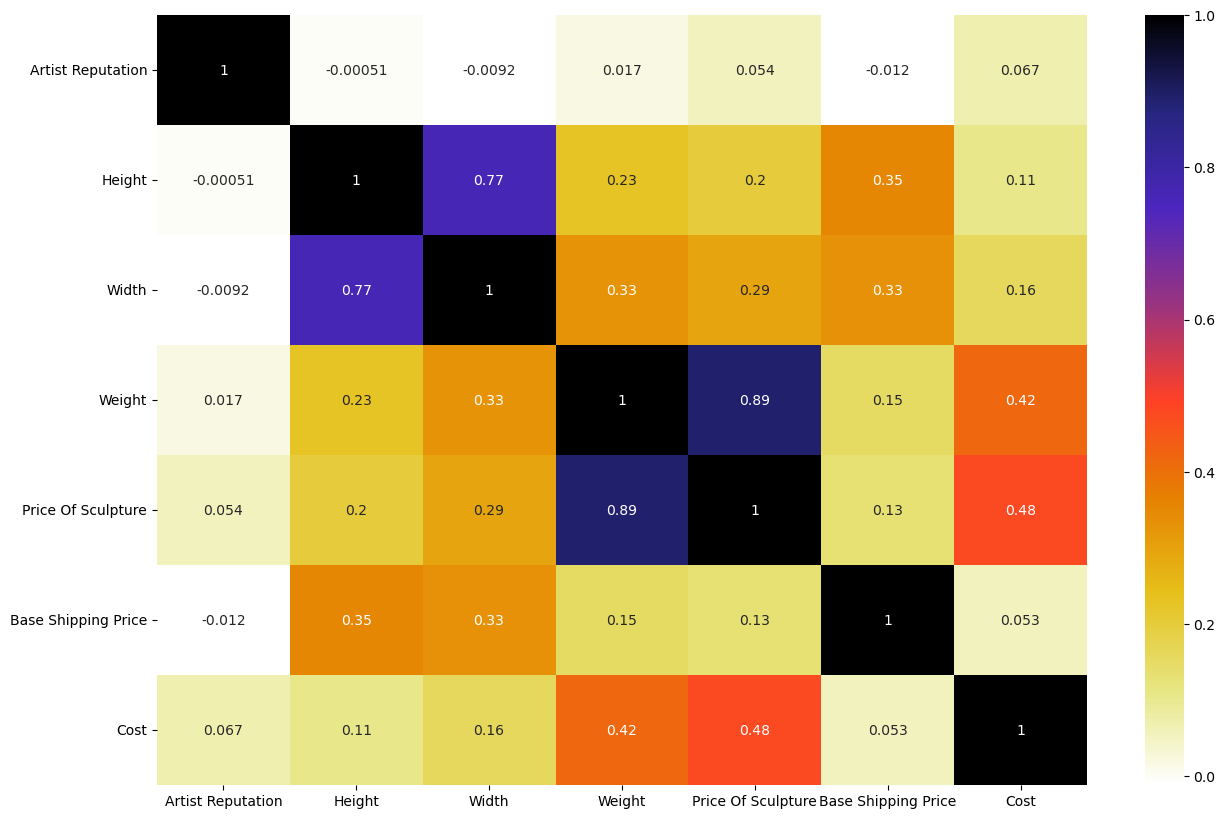

In [90]:
"""plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap_r", annot=True)
plt.show()"""
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot heatmap for correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), cmap="CMRmap_r", annot=True)
plt.show()


**Insights** 

- There is a high correlation between `Height`-`Width`, and `Weight`-`Price of Sculpture` 


### Relationship between target and numerical columns 

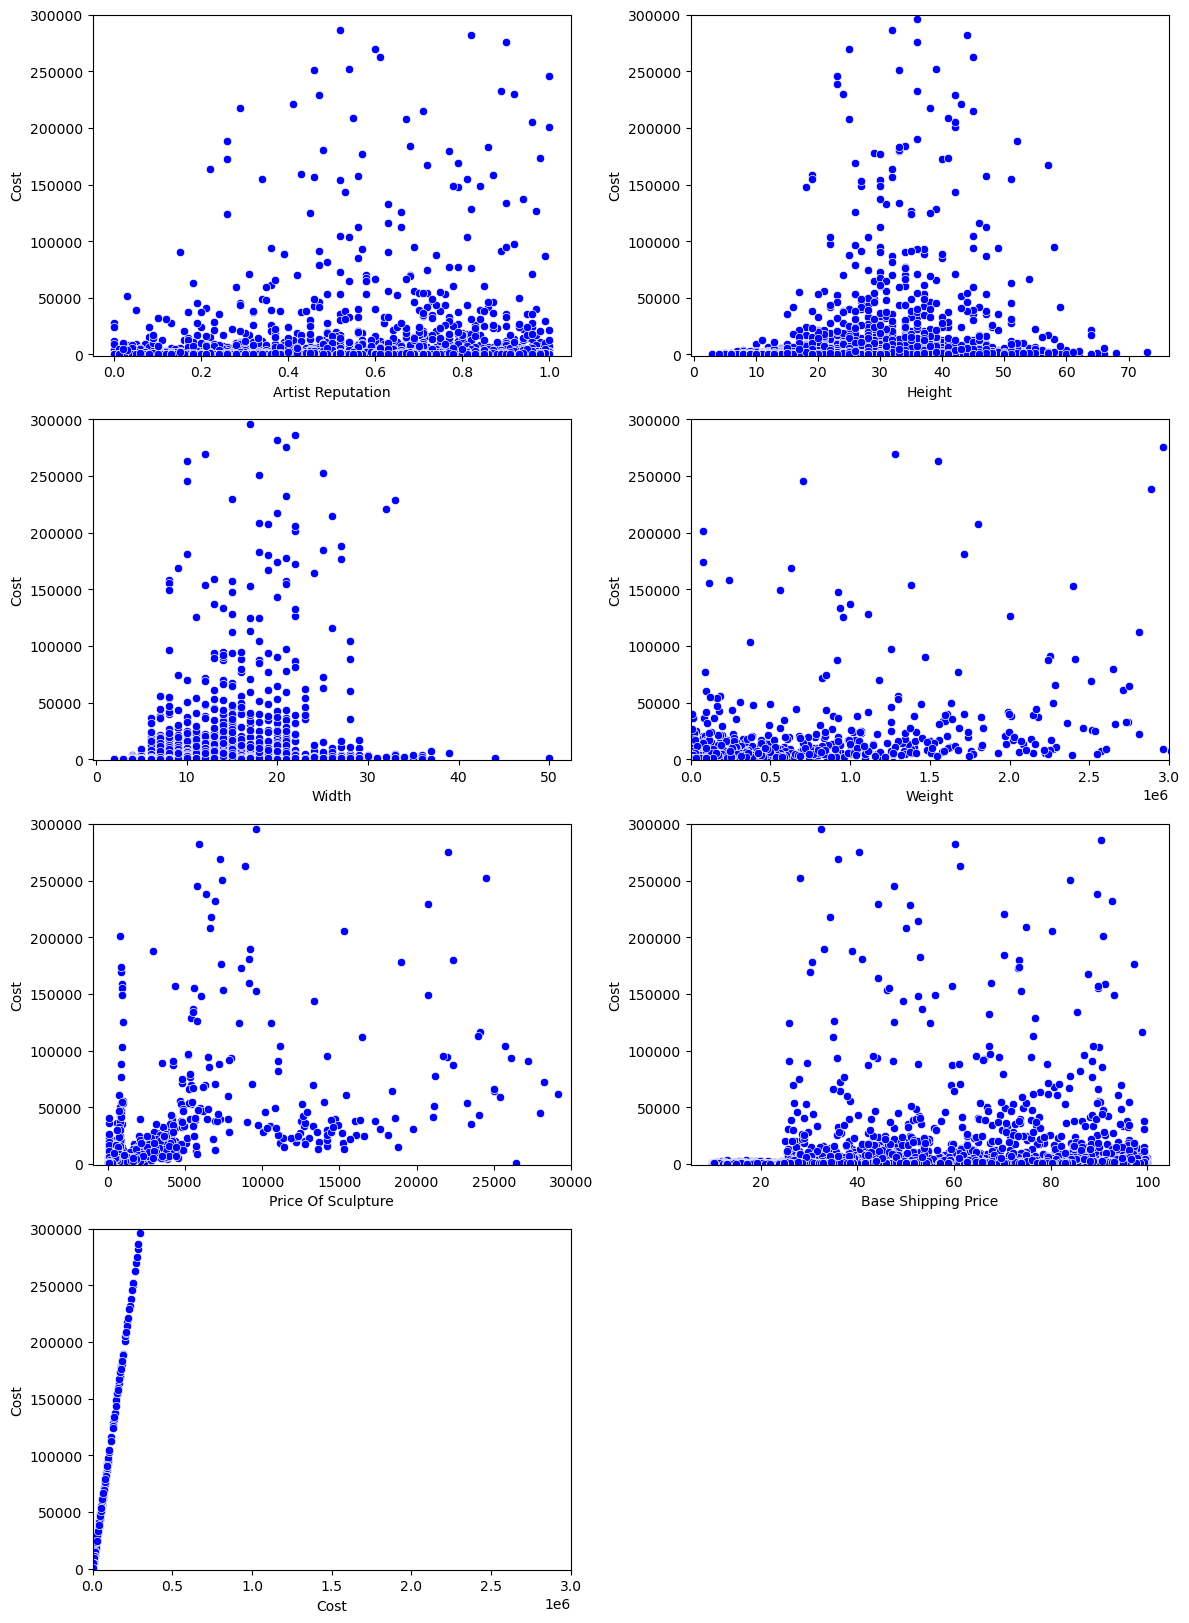

In [91]:
fig = plt.figure(figsize=(12, 24))

for i in range(0, len(numeric_features)):
    ax = plt.subplot(6, 2, i+1)
    sns.scatterplot(data= df ,y=target_feature, x=numeric_features[i], color='b')
    if df[numeric_features[i]].max() > 30000:
        plt.xlim(-1000,30000)
    if df[numeric_features[i]].max() > 3000000:
        plt.xlim(-1000,3000000)
    plt.ylim(-1000, 300000)
    plt.tight_layout()

**Insights** 

- We can observe that there seems to be very low linear relationship between the independent and dependent features

- There seems to be linear relationship between Price of sculpture and the target column

## Visualizing Independent columns

<font size=3>**Target Feature**</font> 


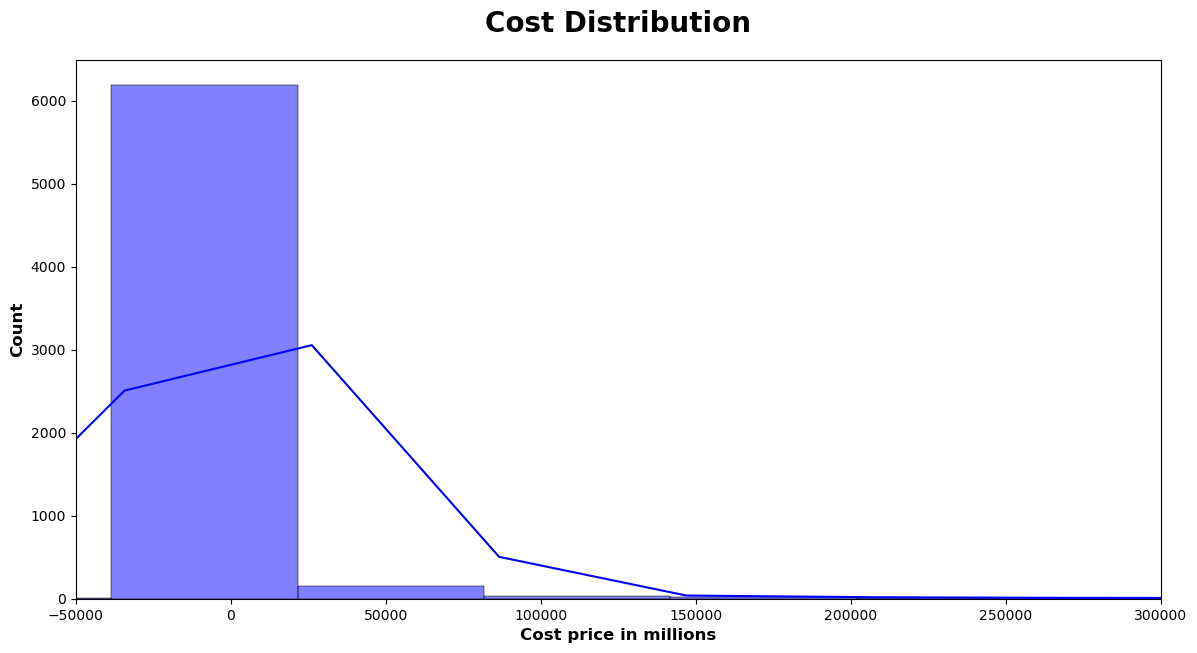

In [92]:
plt.subplots(figsize=(14,7))
sns.histplot(df[target_feature], bins=200, kde=True, color = 'b')
plt.title("Cost Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Cost price in millions", weight="bold", fontsize=12)
plt.xlim(-50000,300000)
plt.show()

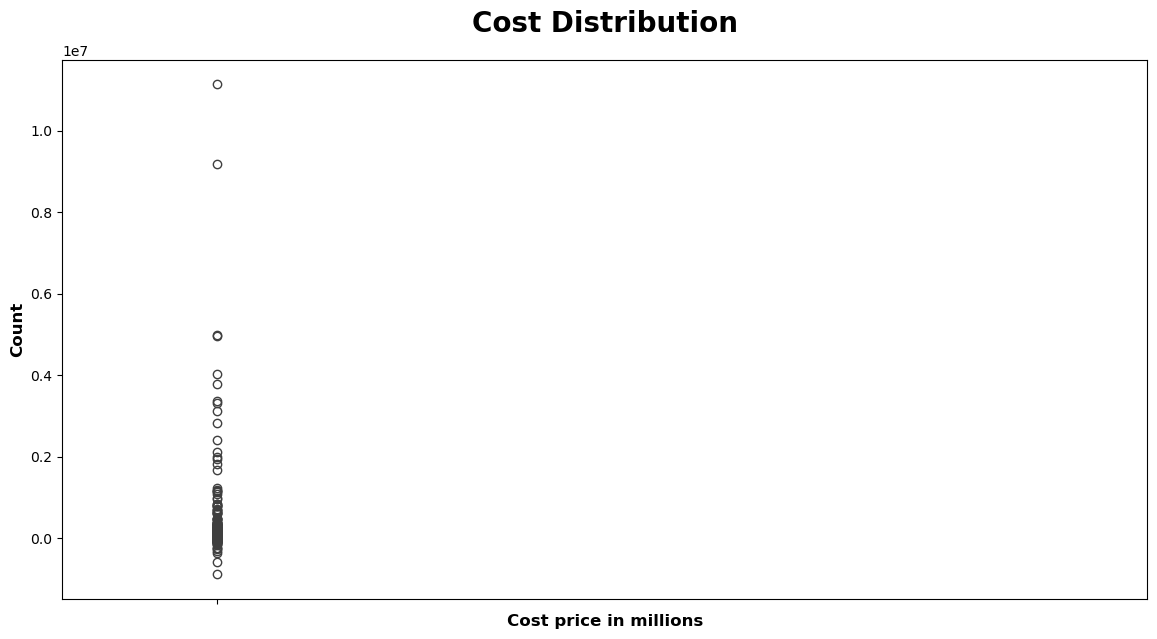

In [93]:
plt.subplots(figsize=(14,7))
sns.boxplot(df[target_feature])
plt.title("Cost Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Cost price in millions", weight="bold", fontsize=12)
plt.xlim(-50000,300000);

**Insights** 

- There are outliers in the target feature and we need to transform

<font size=3>**How shipment type is affecting cost of shipment?**</font> 


C:\Users\Pratik\AppData\Local\Temp\ipykernel_8844\3347680163.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=international.index, y=international.values, ec = "black", palette="Set2")


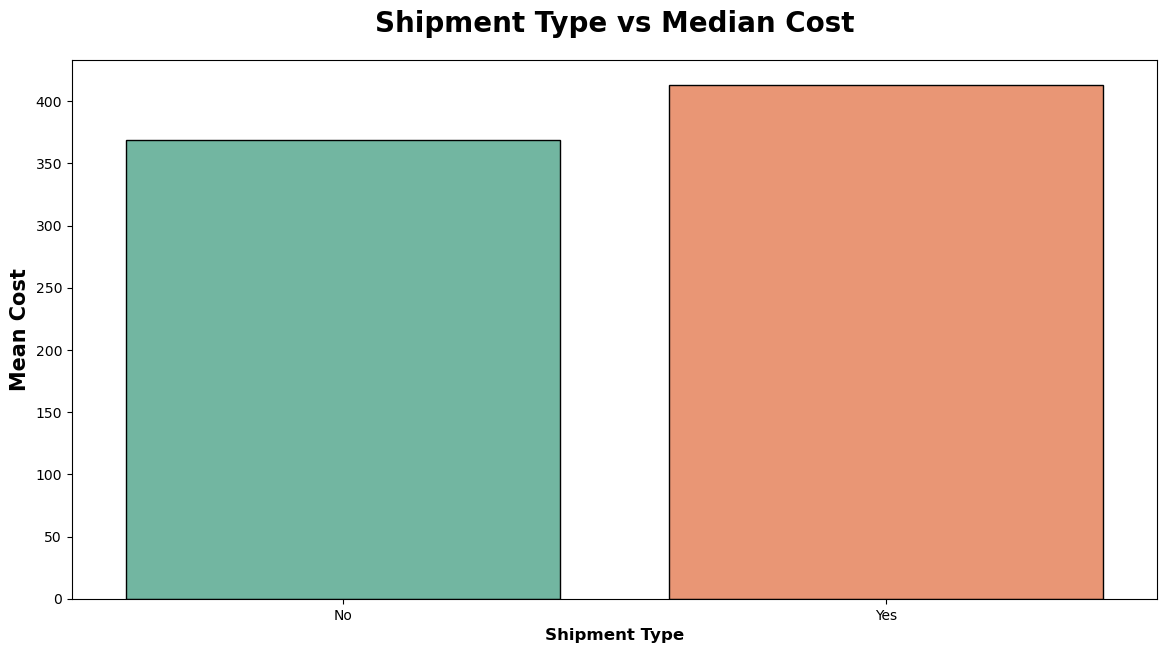

In [94]:
international = df.groupby('International')[target_feature].median()
international.to_frame()

plt.subplots(figsize=(14,7))
sns.barplot(x=international.index, y=international.values, ec = "black", palette="Set2")
plt.title("Shipment Type vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Shipment Type", weight="bold", fontsize=12)
plt.show()

In [95]:
df['International'].value_counts()

International
No     4294
Yes    2206
Name: count, dtype: int64

In [96]:
international_shipment_median = df[df['International'] == 'Yes']['Cost'].median()
domestic_shipment_median = df[df['International'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of International and domestic is {international_shipment_median-domestic_shipment_median}")

The difference between the median shipment price of International and domestic is 43.91500000000008


**Insights**

- There is only a difference of 43 in the shipping cost between International and domestic, so it won't affect much at the prediction

- There are much more domestic shipement than international

<font size=3>**How Express Shipment is affecting cost of shipment?**</font> 


C:\Users\Pratik\AppData\Local\Temp\ipykernel_8844\2741062562.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=express_ship.index, y=express_ship.values, ec = "black", palette="Set1")


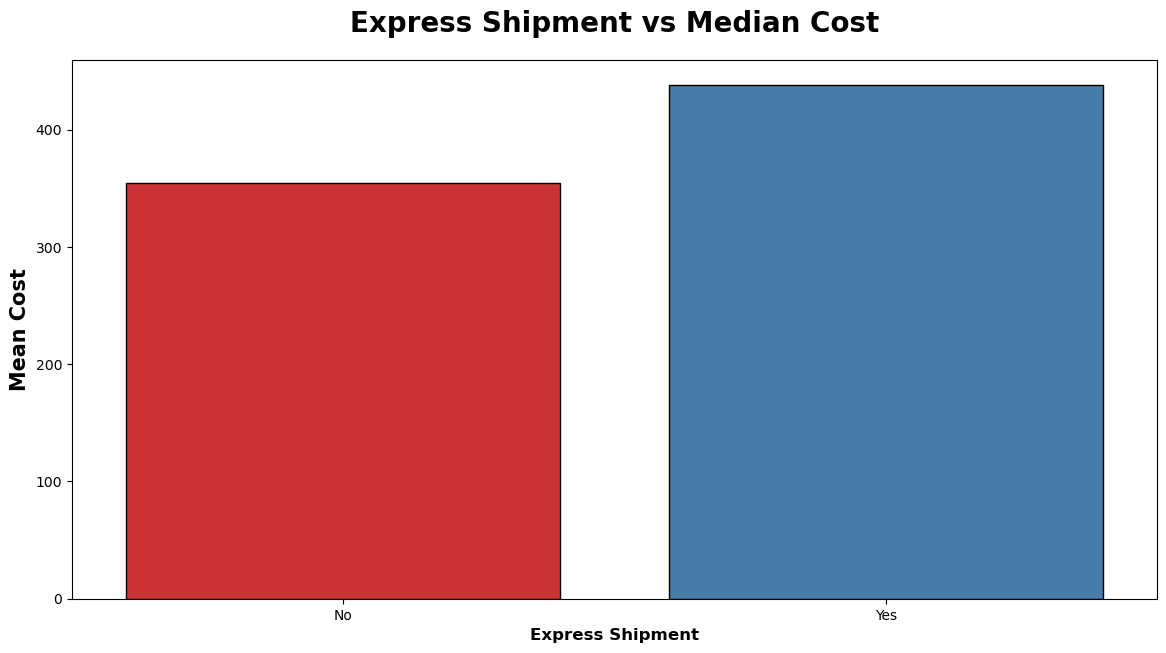

In [97]:
express_ship = df.groupby('Express Shipment')[target_feature].median()
express_ship.to_frame()

plt.subplots(figsize=(14,7))
sns.barplot(x=express_ship.index, y=express_ship.values, ec = "black", palette="Set1")
plt.title("Express Shipment vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Express Shipment", weight="bold", fontsize=12)
plt.show()

In [98]:
df['Express Shipment'].value_counts()

Express Shipment
No     4365
Yes    2135
Name: count, dtype: int64

In [99]:
express_shipment_median = df[df['Express Shipment'] == 'Yes']['Cost'].median()
normal_shipment_median = df[df['Express Shipment'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of express shipment and normal shipment is {express_shipment_median-normal_shipment_median}")

The difference between the median shipment price of express shipment and normal shipment is 83.08000000000004


**Insights**

- In express shipment also, there is only a difference of 83 in the shipping cost between International and domestic, so it won't affect much at the prediction

- It's obvious that there are more normal delivery than express 

<font size=3>**How Installation included or not is affecting cost of shipment?**</font> 


C:\Users\Pratik\AppData\Local\Temp\ipykernel_8844\2928665443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=installation.index, y=installation.values, ec = "black", palette="Set1")


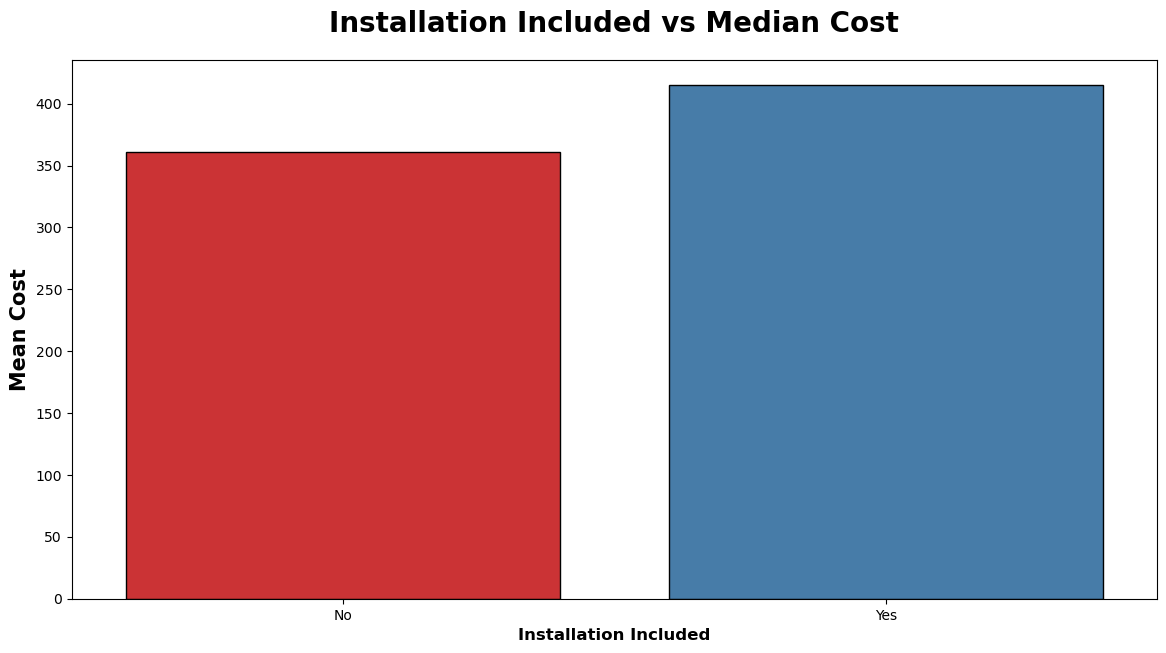

In [100]:
installation = df.groupby('Installation Included')[target_feature].median()
installation.to_frame()

plt.subplots(figsize=(14,7))
sns.barplot(x=installation.index, y=installation.values, ec = "black", palette="Set1")
plt.title("Installation Included vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Installation Included", weight="bold", fontsize=12)
plt.show()

In [101]:
df['Installation Included'].value_counts()

Installation Included
No     3916
Yes    2584
Name: count, dtype: int64

In [102]:
installation_needed_median = df[df['Installation Included'] == 'Yes']['Cost'].median()
installation_not_needed_median = df[df['Installation Included'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of Installation Included and not is {installation_needed_median-installation_not_needed_median}")

The difference between the median shipment price of Installation Included and not is 53.67500000000001


**Insights** 

- There is only a difference of 53 which won't make much a difference at the time of prediction

- We can see that the charges for not installation is less and values are more, which says that a business should try to take contract which requires installation

<font size=3>**How Fragile Cost is affecting cost of shipment?**</font> 


C:\Users\Pratik\AppData\Local\Temp\ipykernel_8844\1726341443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fragile.index, y=fragile.values, ec = "black", palette="Set1")


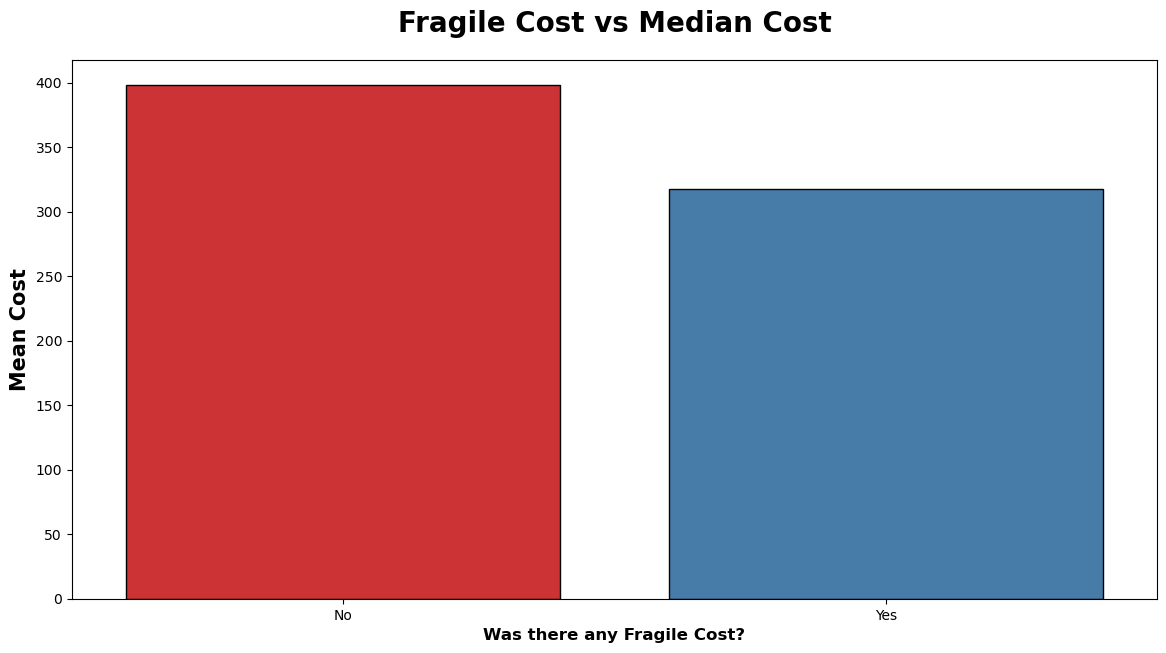

In [103]:
fragile = df.groupby('Fragile')[target_feature].median()
fragile.to_frame()

plt.subplots(figsize=(14,7))
sns.barplot(x=fragile.index, y=fragile.values, ec = "black", palette="Set1")
plt.title("Fragile Cost vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Was there any Fragile Cost?", weight="bold", fontsize=12)
plt.show()

In [104]:
fragile_median = df[df['Fragile'] == 'Yes']['Cost'].median()
fragile_not_median = df[df['Fragile'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of Fragile cost and non-fragile cost is {fragile_median-fragile_not_median}")

The difference between the median shipment price of Fragile cost and non-fragile cost is -80.03000000000003


**Insights**

- There is only a difference of -80 which says that the median cost is more if there is no fragile cost and because the number is small it won't make much of a difference at the time of training model

<font size=3>**How delivery location is affecting cost of shipment?**</font> 


C:\Users\Pratik\AppData\Local\Temp\ipykernel_8844\501147959.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=remote.index, y=remote.values, ec = "black", palette="Set2")


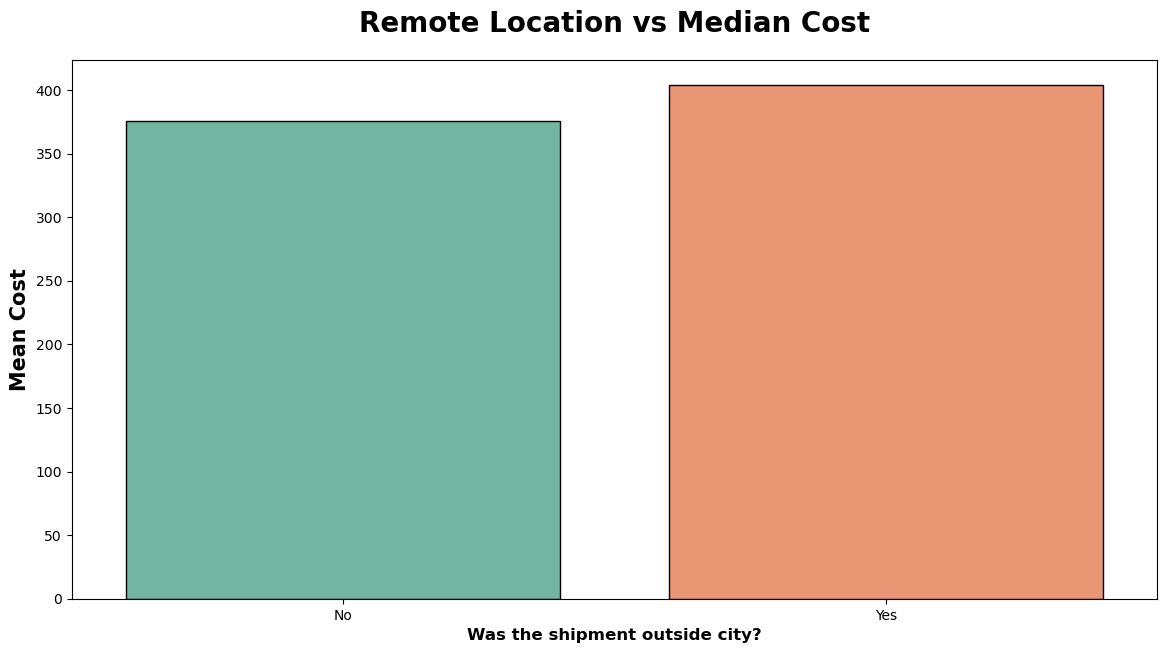

In [105]:
remote = df.groupby('Remote Location')[target_feature].median()
remote.to_frame()

plt.subplots(figsize=(14,7))
sns.barplot(x=remote.index, y=remote.values, ec = "black", palette="Set2")
plt.title("Remote Location vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Was the shipment outside city?", weight="bold", fontsize=12)
plt.show()

In [106]:
remote_median = df[df['Remote Location'] == 'Yes']['Cost'].median()
not_remote_median = df[df['Remote Location'] == 'No']['Cost'].median()

print(f"The difference between the median shipment price of remote shipment and non-remote shipment cost is {remote_median-not_remote_median}")

The difference between the median shipment price of remote shipment and non-remote shipment cost is 27.714999999999975


**Insights** 

- There is only a difference of 27 which won't make much a difference at the time of prediction


<font size=3>**How Customer Financial condition is affecting cost of shipment?**</font> 


C:\Users\Pratik\AppData\Local\Temp\ipykernel_8844\3743510546.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cust_info.index, y=cust_info.values, ec = "black", palette="Set2")


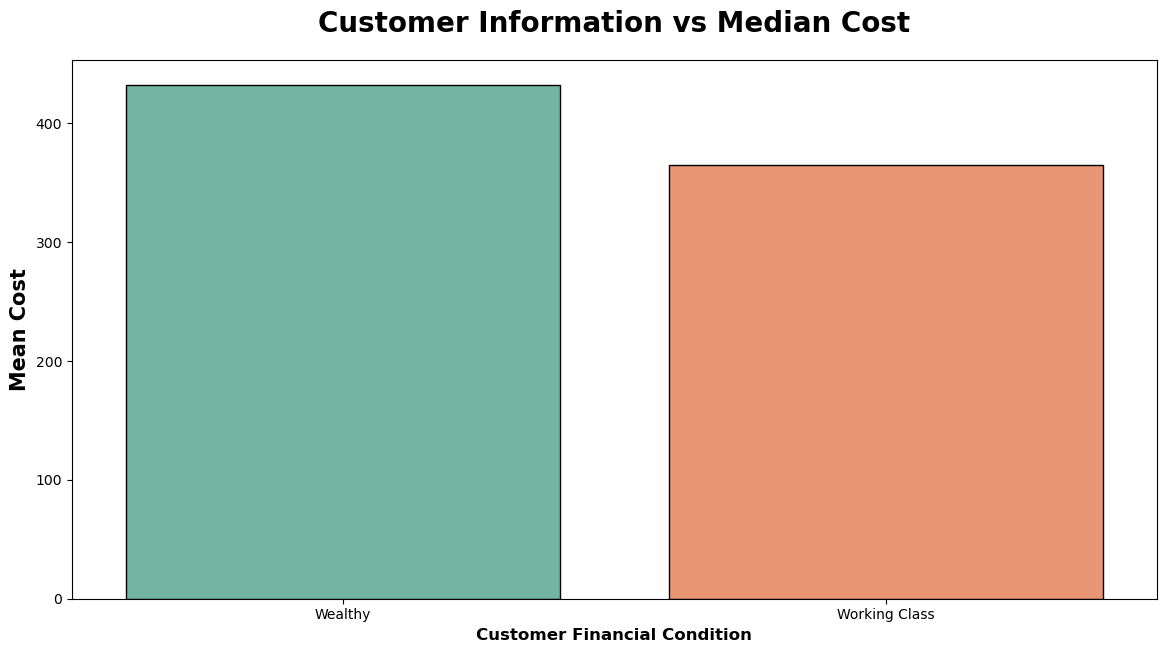

In [107]:
cust_info = df.groupby('Customer Information')[target_feature].median()
cust_info.to_frame()

plt.subplots(figsize=(14,7))
sns.barplot(x=cust_info.index, y=cust_info.values, ec = "black", palette="Set2")
plt.title("Customer Information vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Customer Financial Condition", weight="bold", fontsize=12)
plt.show()

In [108]:
customer_info_wealthy_median = df[df['Customer Information'] == 'Wealthy']['Cost'].median()
customer_info_working_class_median = df[df['Customer Information'] == 'Working Class']['Cost'].median()


print(f"The difference between the median shipment price of remote shipment and non-remote shipment cost is {customer_info_wealthy_median-customer_info_working_class_median}")

The difference between the median shipment price of remote shipment and non-remote shipment cost is 66.94


**Insights**

- There is only a difference of 66 which won't make much a difference at the time of prediction


<font size=3>**Report**</font> 

<font size=3>After understanding relationship between the target column and categorical columns, that there doesn't seem to be much pattern, which model can find in the categorical columns also</font>

## Visualizing date columns


In [109]:
df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'])
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])

C:\Users\Pratik\AppData\Local\Temp\ipykernel_8844\3964803925.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'])
C:\Users\Pratik\AppData\Local\Temp\ipykernel_8844\3964803925.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])


In [110]:
df['year'] = pd.DatetimeIndex(df['Scheduled Date']).year
df['month'] = pd.DatetimeIndex(df['Scheduled Date']).month

In [111]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,...,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost,year,month
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,...,Airways,No,Working Class,No,2015-06-07,2015-06-03,"New Michelle, OH 50777",-283.29,2015,6
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,...,Roadways,No,Working Class,No,2017-03-06,2017-03-05,"New Michaelport, WY 12072",-159.96,2017,3
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,...,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,"Bowmanshire, WA 19241",-154.29,2015,3
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,...,NaN,No,Wealthy,Yes,2015-05-24,2015-05-20,"East Robyn, KY 86375",-161.16,2015,5
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,...,Airways,No,Working Class,No,2016-12-18,2016-12-14,"Aprilside, PA 52793",-159.23,2016,12


In [112]:
x = df.groupby(["year", "month"])["Cost"].mean()
df_wide = x.unstack().T
df_wide.head()

year,2015,2016,2017,2018,2019
month,,,,,
1,1243.620800,12930.272703,13388.419779,47457.768519,2430.550495
2,34249.351818,10034.132545,3427.163673,6612.238687,3840.484630
3,23775.741185,10757.195810,41359.835804,20026.385455,2265.834019
4,94668.648276,4288.732696,26634.491452,4138.730309,8374.422975
5,15884.313833,4103.283514,8857.153077,17461.434118,14129.902741


In [113]:
df_wide[2015]

month
1      1243.620800
2     34249.351818
3     23775.741185
4     94668.648276
5     15884.313833
6      4480.208318
7      1426.520159
8     17085.121760
9      4258.188871
10     4979.386768
11    53043.073800
12    40081.836509
Name: 2015, dtype: float64

C:\Users\Pratik\AppData\Local\Temp\ipykernel_8844\1296080208.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_wide[i],x=df_wide.index,ec = "black", palette="Set2")


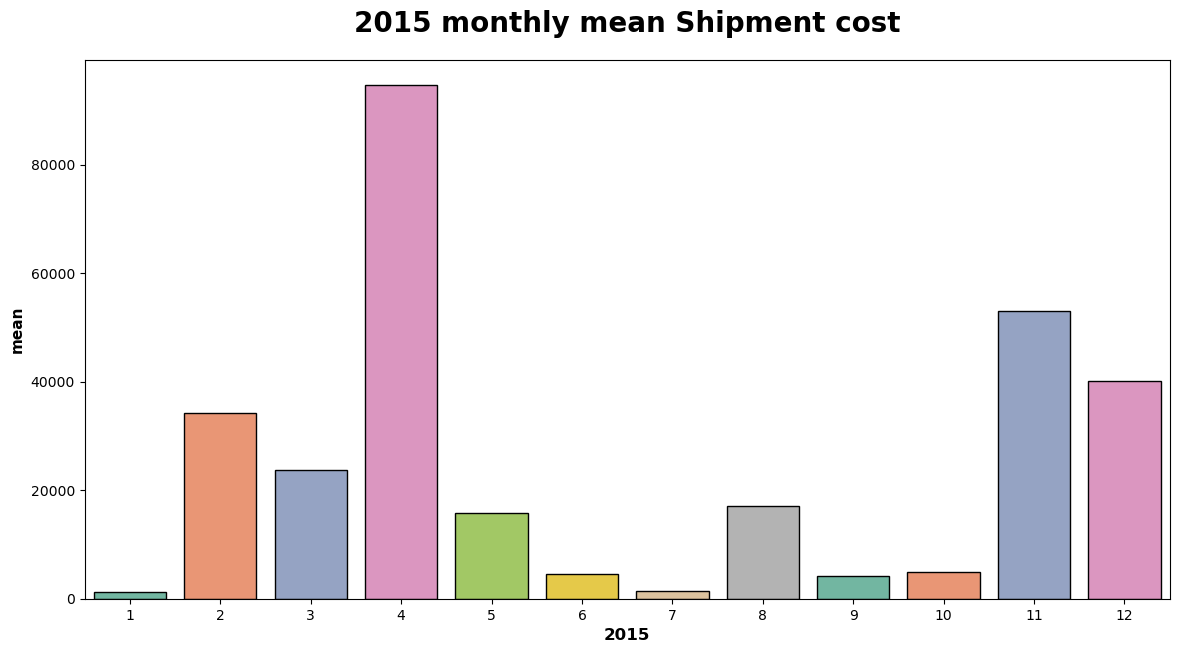

C:\Users\Pratik\AppData\Local\Temp\ipykernel_8844\1296080208.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_wide[i],x=df_wide.index,ec = "black", palette="Set2")


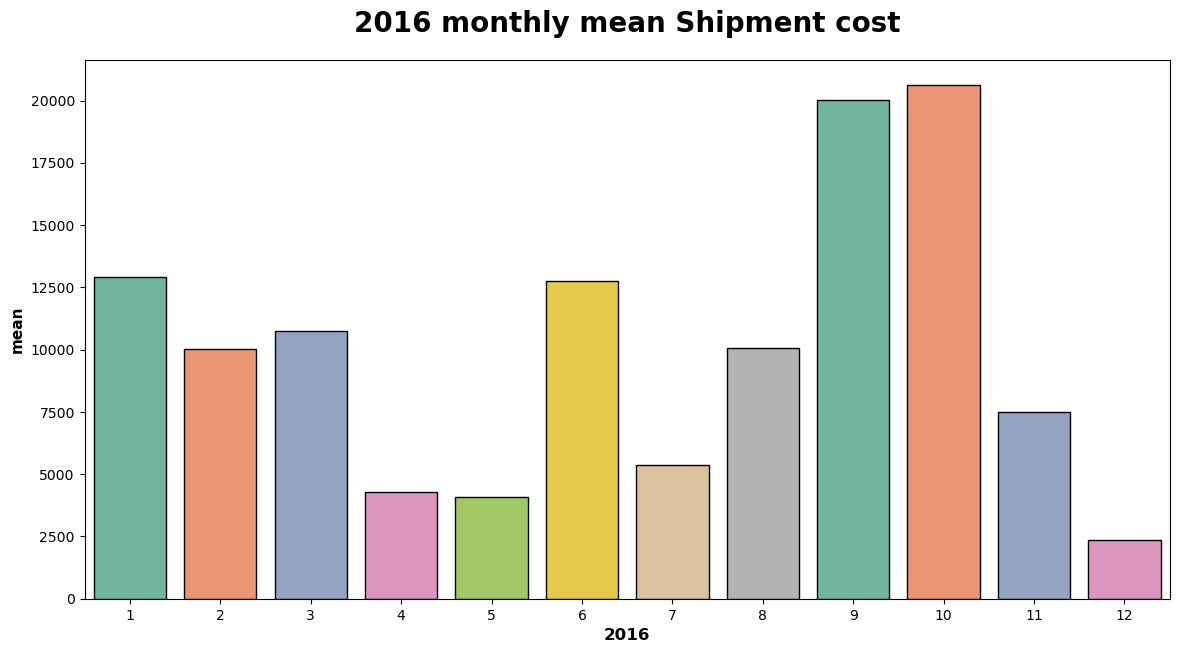

C:\Users\Pratik\AppData\Local\Temp\ipykernel_8844\1296080208.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_wide[i],x=df_wide.index,ec = "black", palette="Set2")


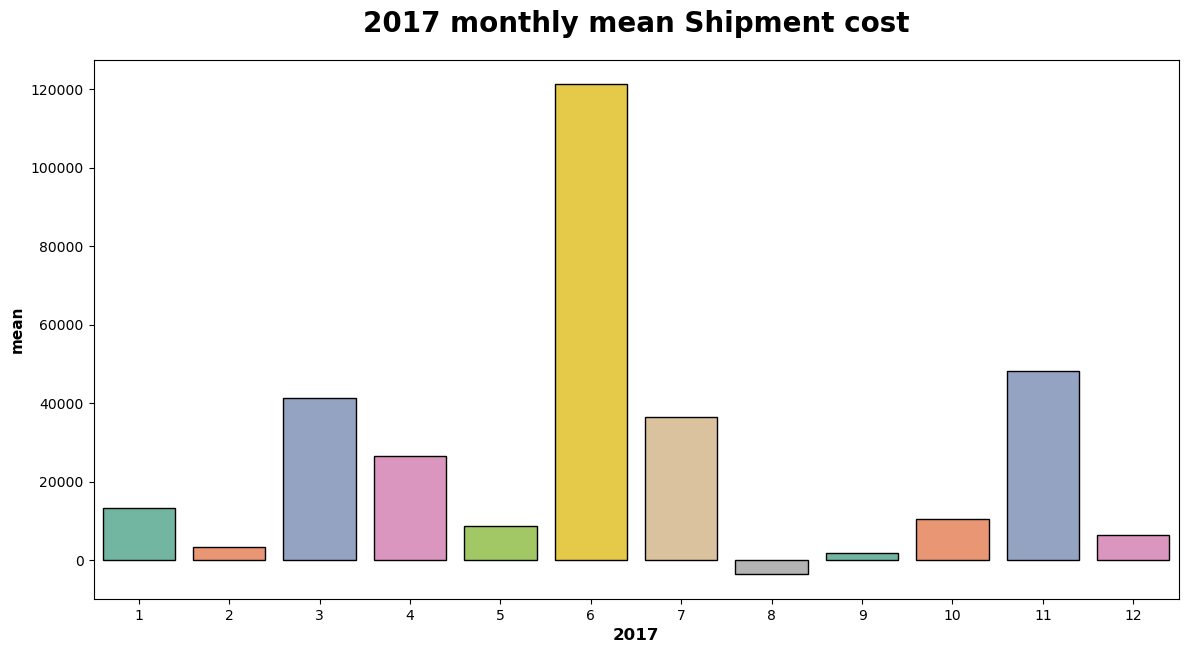

C:\Users\Pratik\AppData\Local\Temp\ipykernel_8844\1296080208.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_wide[i],x=df_wide.index,ec = "black", palette="Set2")


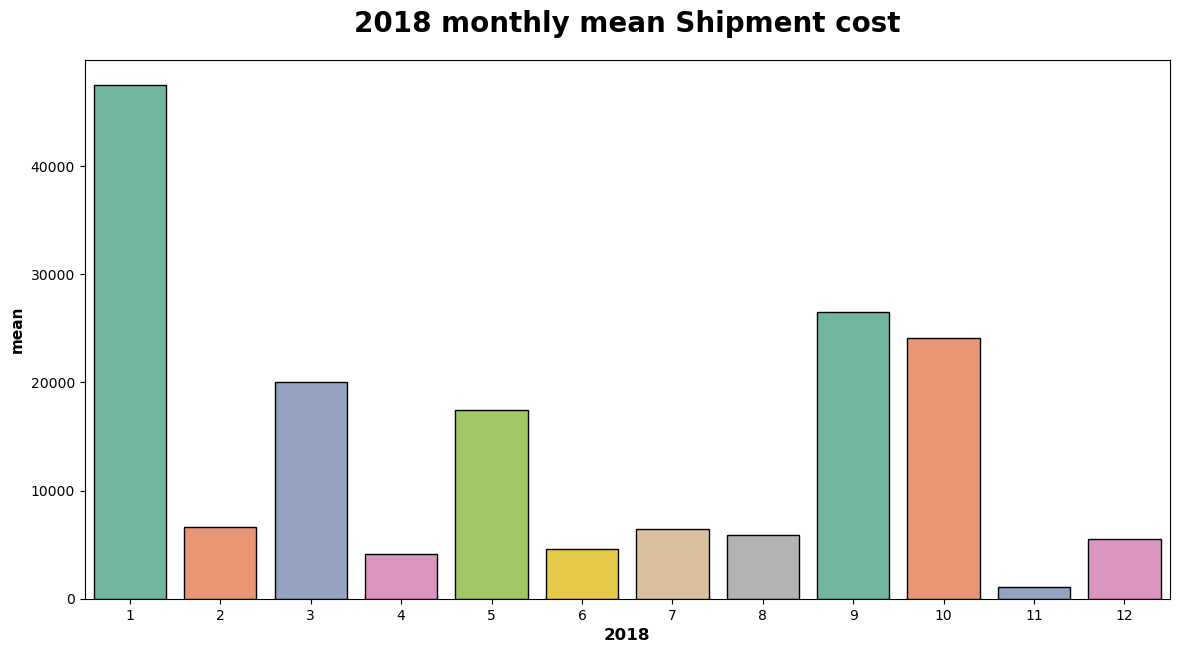

C:\Users\Pratik\AppData\Local\Temp\ipykernel_8844\1296080208.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_wide[i],x=df_wide.index,ec = "black", palette="Set2")


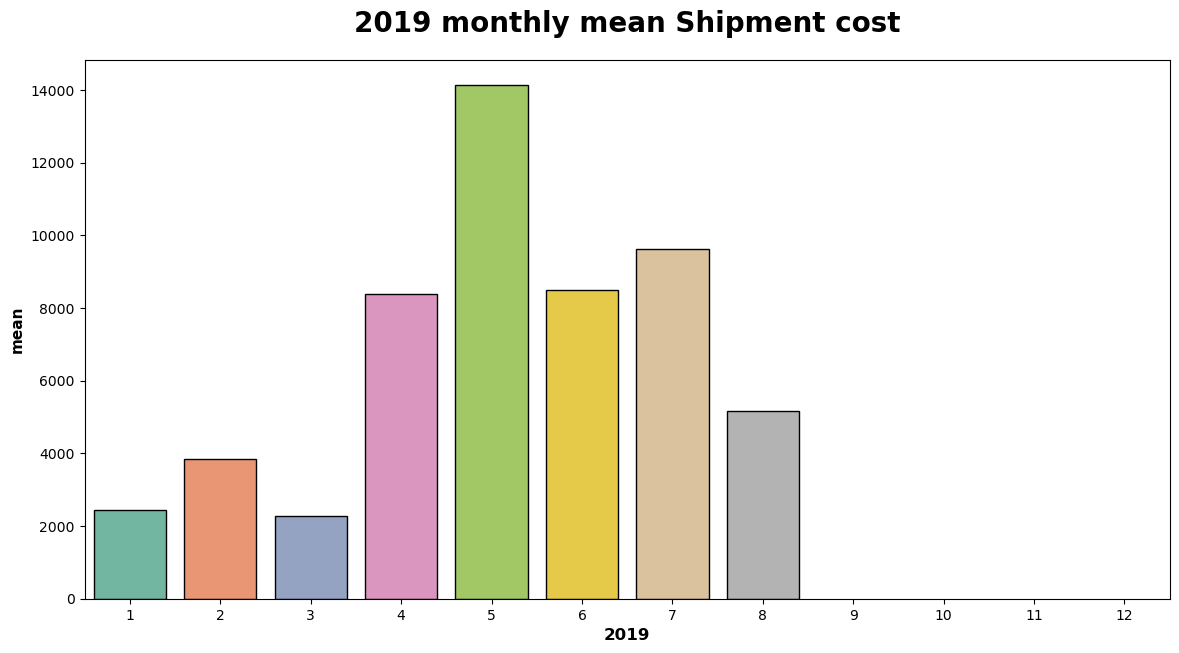

In [114]:
for i in df_wide.columns:
    plt.subplots(figsize=(14,7))
    sns.barplot(y=df_wide[i],x=df_wide.index,ec = "black", palette="Set2")
    plt.title(str(i) + " monthly mean Shipment cost", weight="bold",fontsize=20, pad=20)
    plt.ylabel("mean", weight="bold", fontsize=11)
    plt.xlabel(i, weight="bold", fontsize=12)
    plt.show()

**Insights**
 - Monthly distribution of every year is different
 - For 2015, 2016 and 2018 There were more cost at the start and end of the year.
 - For 2017 and 2019 cost were high mid year.

C:\Users\Pratik\AppData\Local\Temp\ipykernel_8844\3063941337.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.year,ec = "black", palette="Set2")


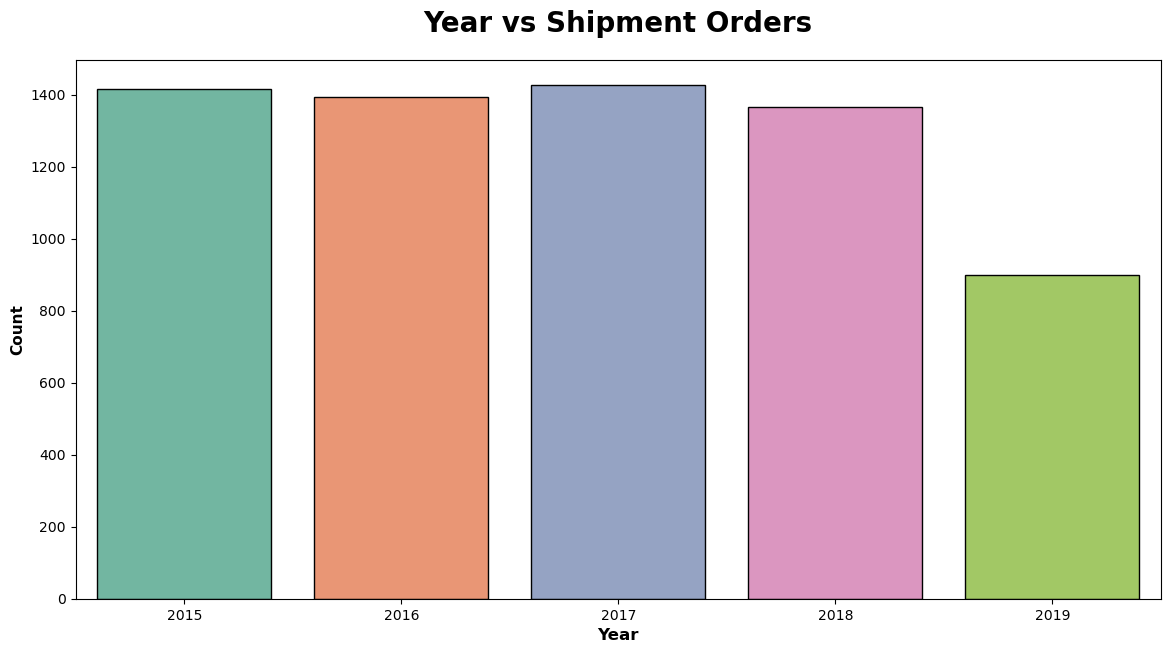

In [115]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.year,ec = "black", palette="Set2")
plt.title("Year vs Shipment Orders", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=11)
plt.xlabel("Year", weight="bold", fontsize=12)
plt.show()

C:\Users\Pratik\AppData\Local\Temp\ipykernel_8844\1846697422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.month,ec = "black", palette="Set2")


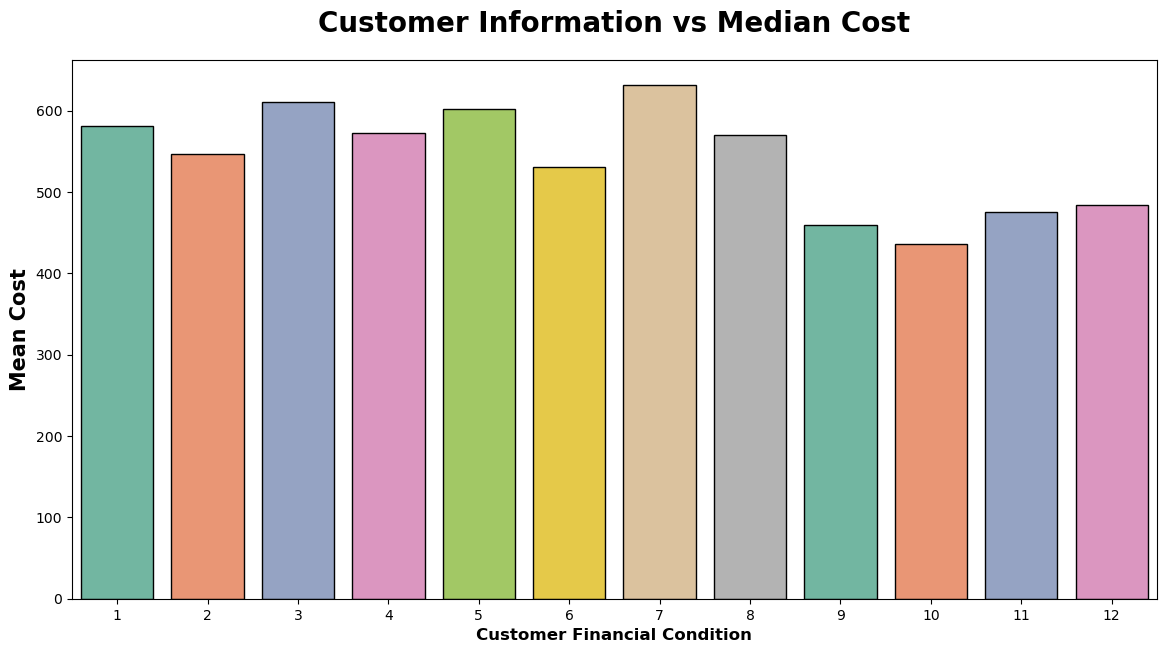

In [116]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.month,ec = "black", palette="Set2")
plt.title("Customer Information vs Median Cost", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mean Cost", weight="bold", fontsize=15)
plt.xlabel("Customer Financial Condition", weight="bold", fontsize=12)
plt.show()

# Final Report


* The `Cost` column is the target to predict.
* The target variable here is continuous.
* There are outliers in some columns we have to remove outliers.
* `date` column should be configured to extract `year` and `month`.
* Null values in `Artist Reputation`, `Height`, `Width`, `Weight`, `Material`, `Transport`, `Remote Location` needs to be handled